## Visualización con Seaborn

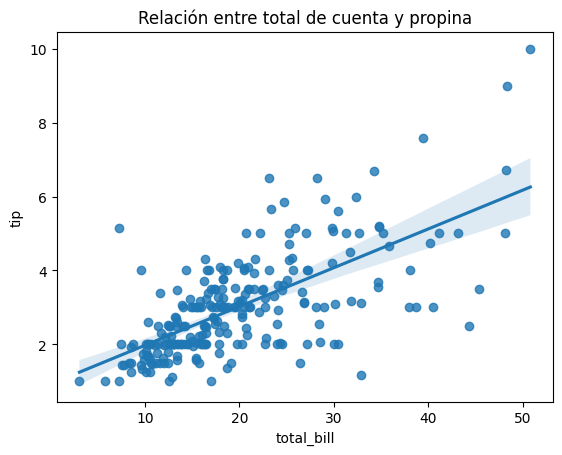

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="total_bill", y="tip", data=sns.load_dataset("tips"))
plt.title("Relación entre total de cuenta y propina")
plt.show()


- Cada punto es una mesa: cuánto pagó (total_bill) y cuánto dejó de propina (tip).
- La nube de puntos te dice “parece que cuando la cuenta sube, la propina tiende a subir”.
- La línea es una recta de regresión lineal.
- El sombreado es el intervalo de confianza.

## Ajuste Estadístico con Statsmodels

método de los mínimos cuadrados ordinarios (OLS)

In [2]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

data = sns.load_dataset("tips")

X = sm.add_constant(data["total_bill"]) # Agrega la constante (intercepto) para que el modelo pueda estimar una recta que no esté forzada a pasar por el origen.
y = data["tip"]

modelo = sm.OLS(y, X).fit() # Ajusta el modelo de regresión lineal usando OLS, calculando los coeficientes que mejor explican y a partir de X minimizando el error cuadrático.
# OLS: Es el método que encuentra la recta “óptima” minimizando la suma de los errores al cuadrado entre los valores observados y los predichos.
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        11:20:23   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

- Es la versión matemática de la línea

tip=0.92+0.105⋅total_bill

- aunque la cuenta sea muy pequeña, en promedio hay una propina base cercana a 0.92
- por cada 1 dólar extra en la cuenta, la propina sube en promedio 10.5 centavos

El total_bill:

coeficiente: 0.105

p-value: 0.000

* la pendiente es distinta de cero
y es extremadamente poco probable que sea producto del azar

R-squared: 0.457
- el total de la cuenta explica casi un 46 % de la variabilidad de las propinas
- el resto depende de otras cosas: servicio, personas, hábitos, contexto

El intercepto (const) 0.92, con p-value 0.000
- no es que alguien deje propina con cuenta cero
es un parámetro técnico que ayuda a posicionar la recta correctamente

Resumen:
- El gráfico nos dijo que había una relación.
- El OLS nos confirmó que es real, la cuantificó y nos dijo cuánto explica.

## Cálculo de Métricas en Python

In [5]:
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones del modelo
y_pred = modelo.predict(X)

# Cálculo de métricas
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 0.7458
MSE: 1.0360
RMSE: 1.0179
R²: 0.4566


Error Absoluto Medio

MAE = 0.7458
- En promedio, el modelo se equivoca en 0.75 dólares de propina (aprox).
- “Mi error típico, sin castigar demasiado los casos extremos.”

Error Cuadrático Medio

MSE = 1.0360
- Es el error al cuadrado promedio.
- Cuesta interpretarlo porque queda en “dólares²”.
- Sirve más para comparar modelos y porque penaliza fuerte errores grandes.

Raíz del Error Cuadrático Medio

RMSE = 1.0179
- Error típico “castigando más” los errores grandes, pero en dólares.
- Aquí te dice: “Un error típico ronda 1 dólar.”
- Y como RMSE > MAE, te está insinuando que hay algunos errores más grandes dando vueltas.

coeficiente de determinación R²

R² = 0.4566
- El modelo explica ~46% de la variabilidad de la propina.
- Esto calza con tu summary() (R-squared ~0.457).
- Traducción: “La cuenta importa harto, pero no es lo único.”

## Implementación en Python con Librería Statsmodels

In [6]:
import statsmodels.api as sm
import numpy as np

# Generate sample data
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.normal(size=100)

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     3142.
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           2.93e-76
Time:                        12:26:38   Log-Likelihood:                -141.18
No. Observations:                 100   AIC:                             286.4
Df Residuals:                      98   BIC:                             291.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1798      0.199      0.903      0.3

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
tips = sns.load_dataset('tips')

# Definir variables
X = tips[['total_bill']]
y = tips['tip']

# Agregar constante para el intercepto
X = sm.add_constant(X)


In [20]:
# Ajustar el modelo
model = sm.OLS(y, X).fit()
# Obtener resumen estadístico
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        12:50:33   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [21]:
# Crear un nuevo dato para predicción, asegurándose de incluir la columna 'const'
nuevo_dato = pd.DataFrame({'const': [1], 'total_bill': [30]})

# Realizar predicción
prediccion = model.predict(nuevo_dato)

print(f"Propina estimada para una cuenta de $30: ${prediccion[0]:.2f}")

Propina estimada para una cuenta de $30: $4.07


## Regresión Lineal Múltiple: Definición

In [22]:
# Definir múltiples predictores
X_multi = tips[['total_bill', 'size']]
X_multi = sm.add_constant(X_multi)

# Ajustar modelo múltiple
model_multi = sm.OLS(y, X_multi).fit()

# Ver resumen
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           9.67e-34
Time:                        12:50:40   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

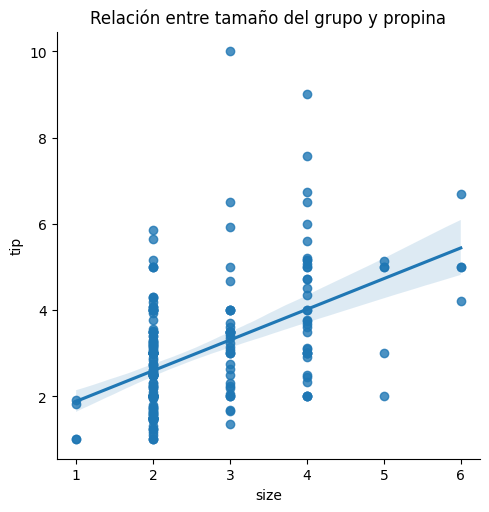

In [23]:
sns.lmplot(x='size', y='tip', data=tips)
plt.title('Relación entre tamaño del grupo y propina')
plt.show()


# **PARTE 2**

Verificación de Homocedasticidad

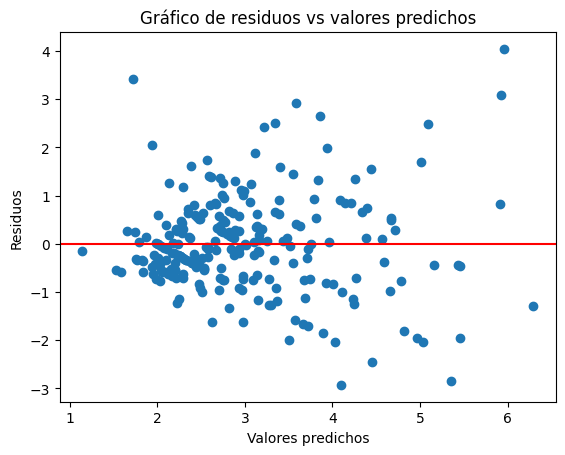

In [25]:
import matplotlib.pyplot as plt

residuos = model_multi.resid
fitted = model_multi.fittedvalues

plt.scatter(fitted, residuos)
plt.axhline(0, color="red")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos vs valores predichos")
plt.show()

Verificación de Normalidad del Error

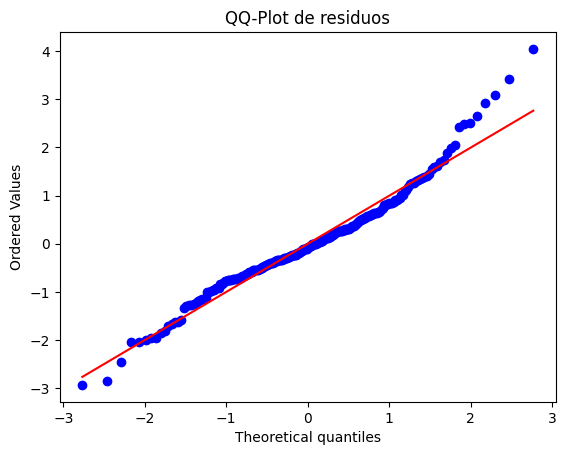

In [26]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de residuos")
plt.show()


Verificación de Multicolinealidad

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_multi.columns
vif_data["VIF"] = [variance_inflation_factor(X_multi.values, i)
for i in range(X_multi.shape[1])]
print(vif_data)

     Variable       VIF
0       const  8.904095
1  total_bill  1.557586
2        size  1.557586


In [30]:
print(modelo.rsquared)
print(modelo.rsquared_adj)

0.45661658635167657
0.4543712003448652


In [32]:
print("AIC:", modelo.aic)
print("BIC:", modelo.bic)

AIC: 705.0761662637547
BIC: 712.070502714341


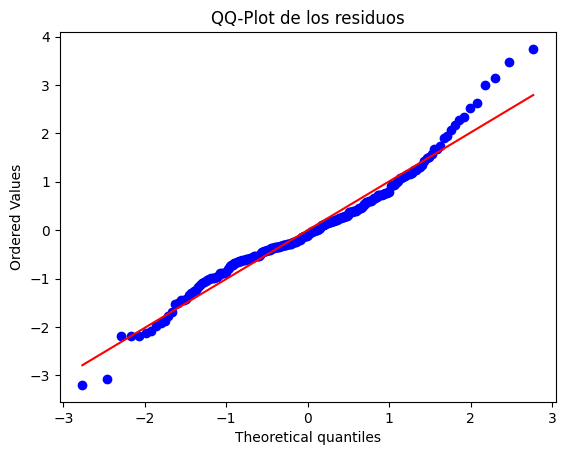

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Residuos del modelo
residuos = modelo.resid

# QQ-Plot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot de los residuos")
plt.show()


Pruebas Estadísticas de Normalidad

In [34]:
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Test de Shapiro-Wilk - Estadístico: {shapiro_test[0]:.4f}, p-valor: {shapiro_test[1]:.4f}")
# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuos, 'norm', args=(np.mean(residuos), np.std(residuos, ddof=1)))
print(f"Test de Kolmogorov-Smirnov - Estadístico: {ks_test[0]:.4f}, p-valor: {ks_test[1]:.4f}")


Test de Shapiro-Wilk - Estadístico: 0.9673, p-valor: 0.0000
Test de Kolmogorov-Smirnov - Estadístico: 0.0762, p-valor: 0.1114
